### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from mlxtend.plotting import plot_decision_regions 
import missingno as msno 
from pandas.plotting import scatter_matrix 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn import metrics 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import GridSearchCV 
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline

### Importing Data

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

### Analyzing the data

In [4]:
# Total number of columns in dataset

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Know more about dataset

df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
# More about data woth transpose

df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [8]:
# Check the missing values

df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [9]:
# Sum of null values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing count of NaN values

print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### Visualizing the data

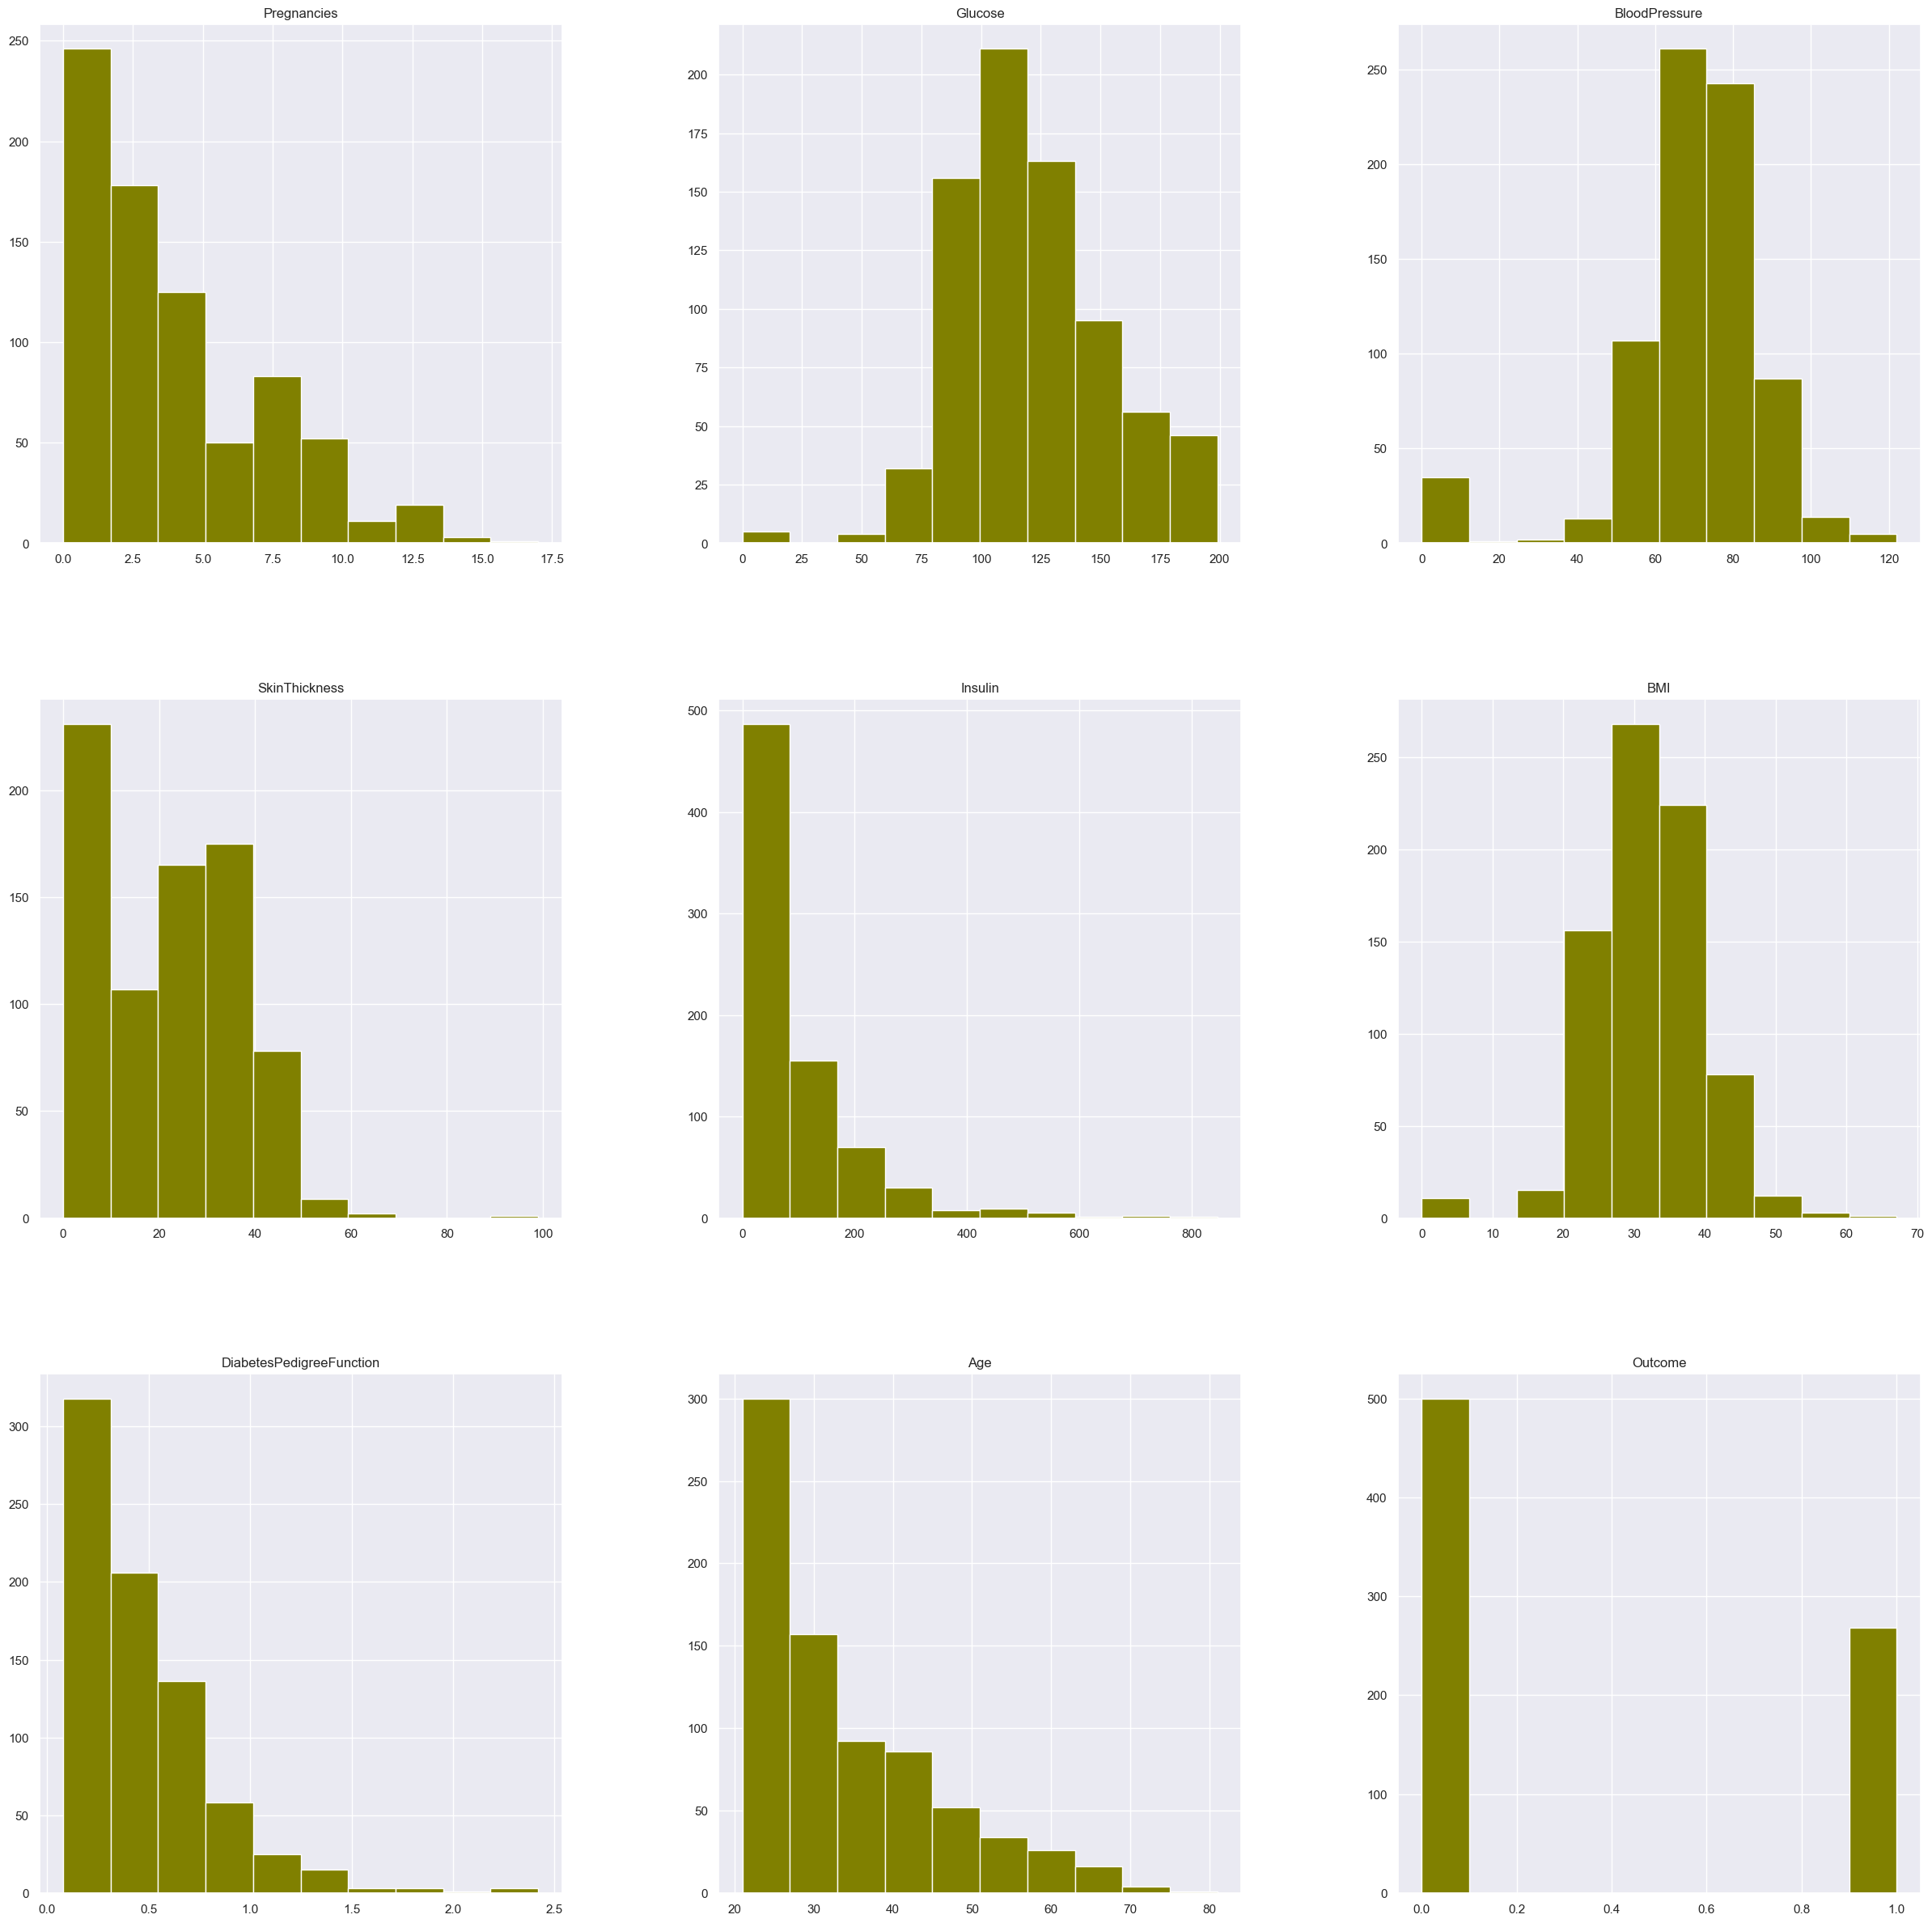

In [11]:
# Plotting the data distribution plot
p = df.hist(figsize=(30,30),color='olive')

In [12]:
# Aiming to impute NAN values for the columns in accordance with their 

df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace= True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace= True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace= True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace = True)

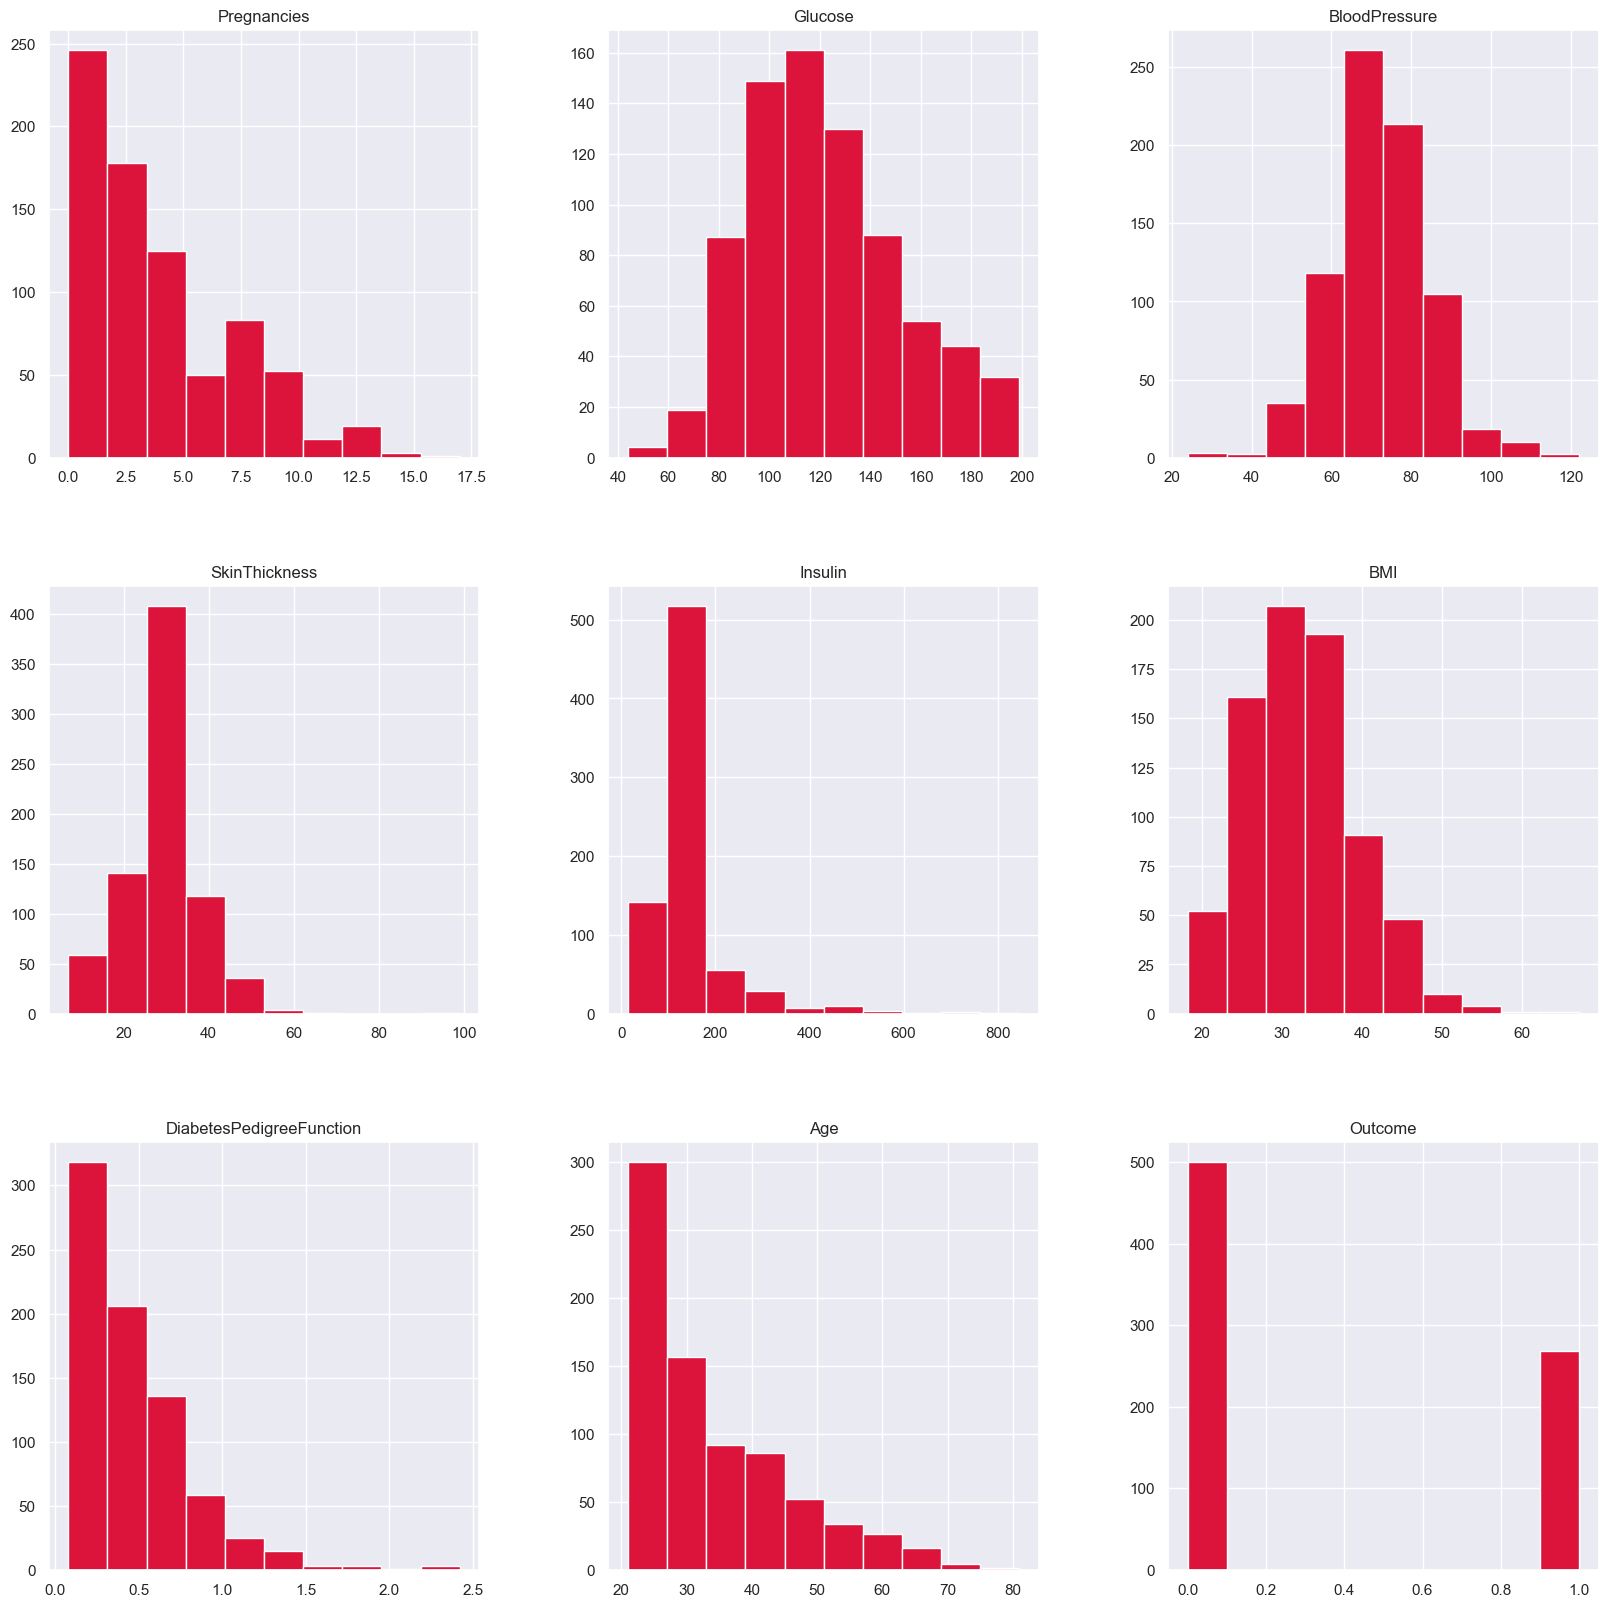

In [13]:
# Plotting the distribution after removing NaN values

p = df_copy.hist(figsize = (20,20),color='crimson')

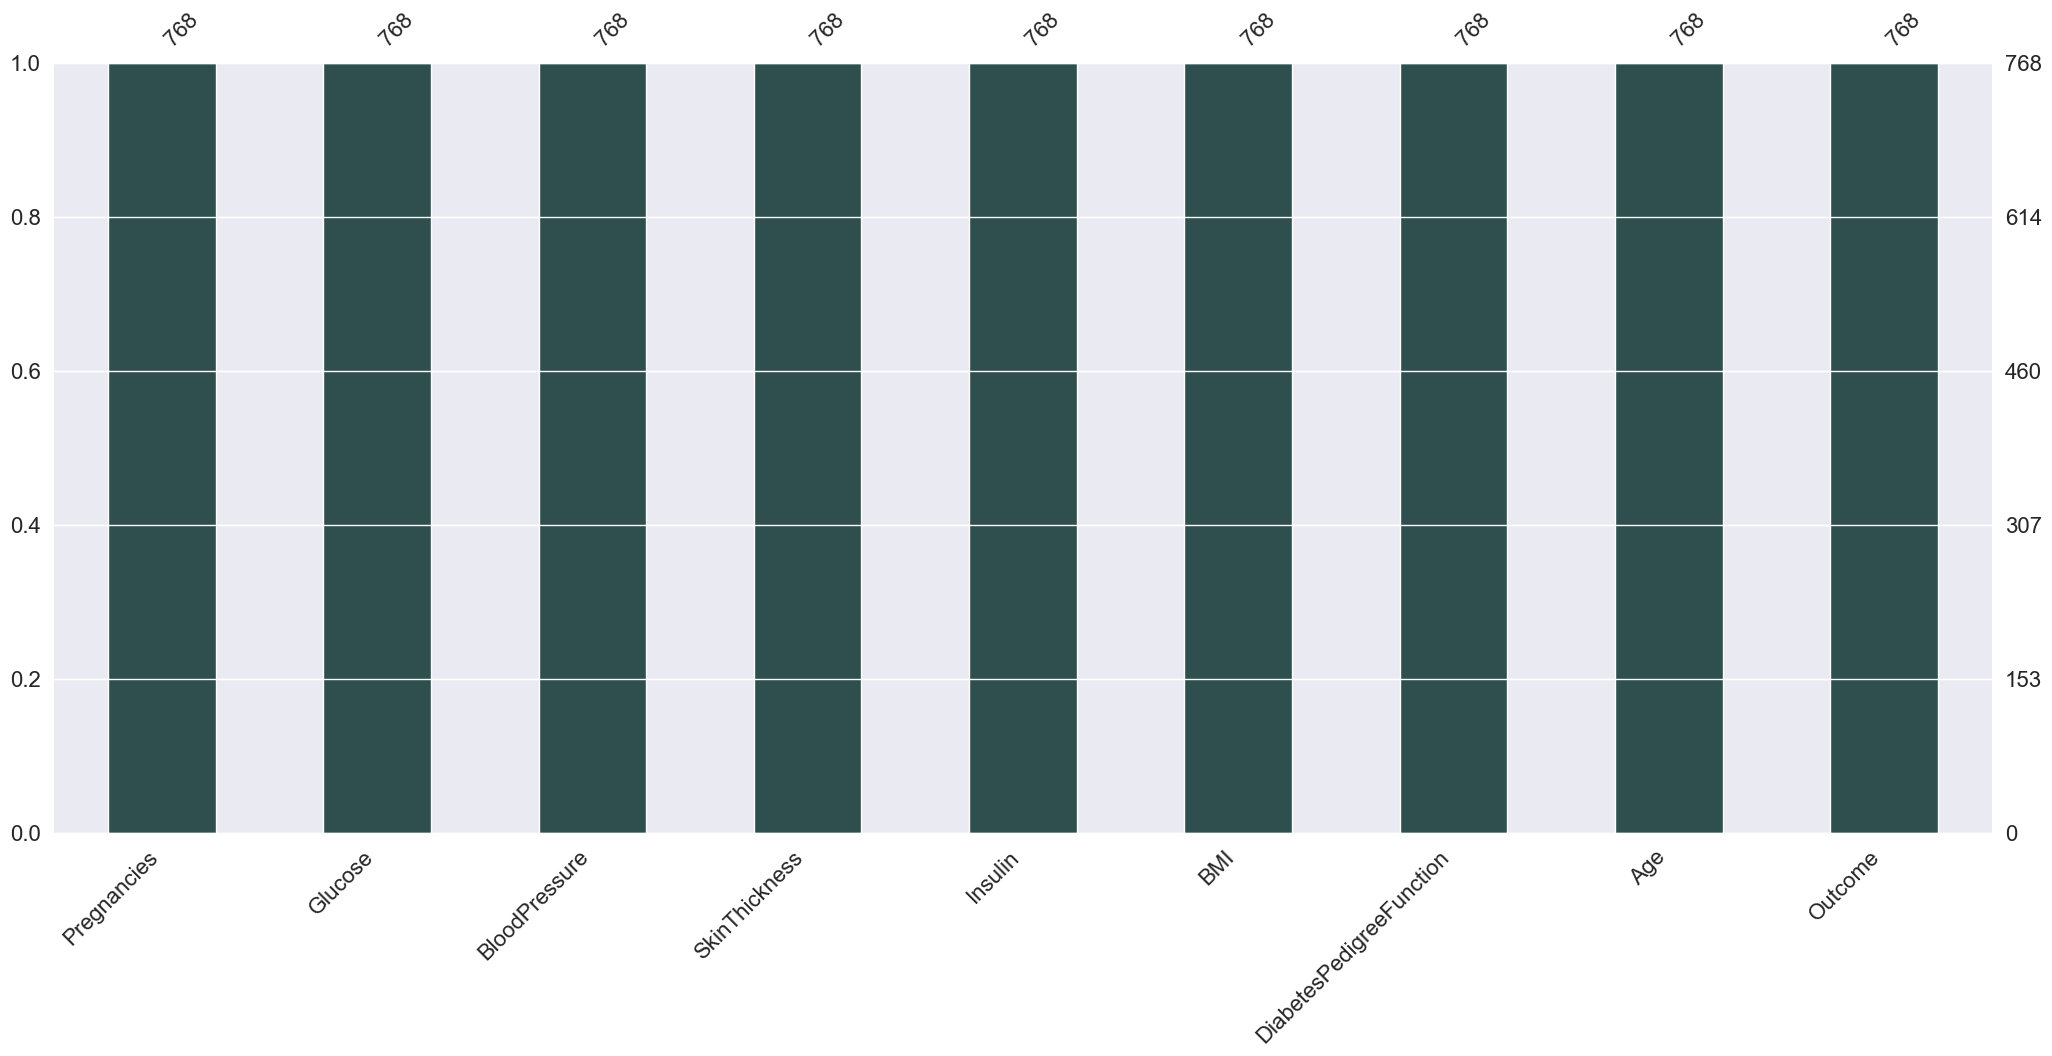

In [14]:
# Plotting Null count Analysis Plot

p = msno.bar(df,color='darkslategrey')

0    500
1    268
Name: Outcome, dtype: int64


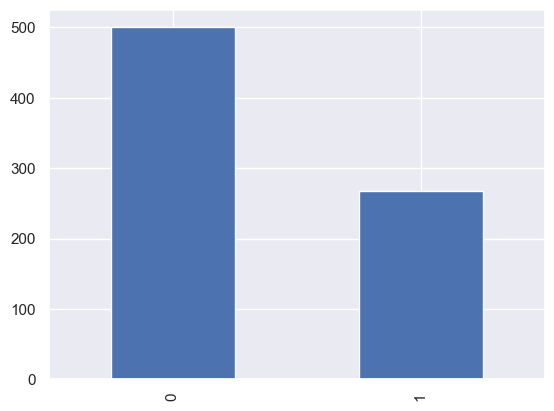

In [15]:
# Checking the balance of the data by plotting the count of outcomes by their values

color_wheel = {1:'#0392cf',2:'#7bc043'}
colors = df["Outcome"].map(lambda x: color_wheel.get(x+1))
print(df.Outcome.value_counts())
p= df.Outcome.value_counts().plot(kind= "bar")

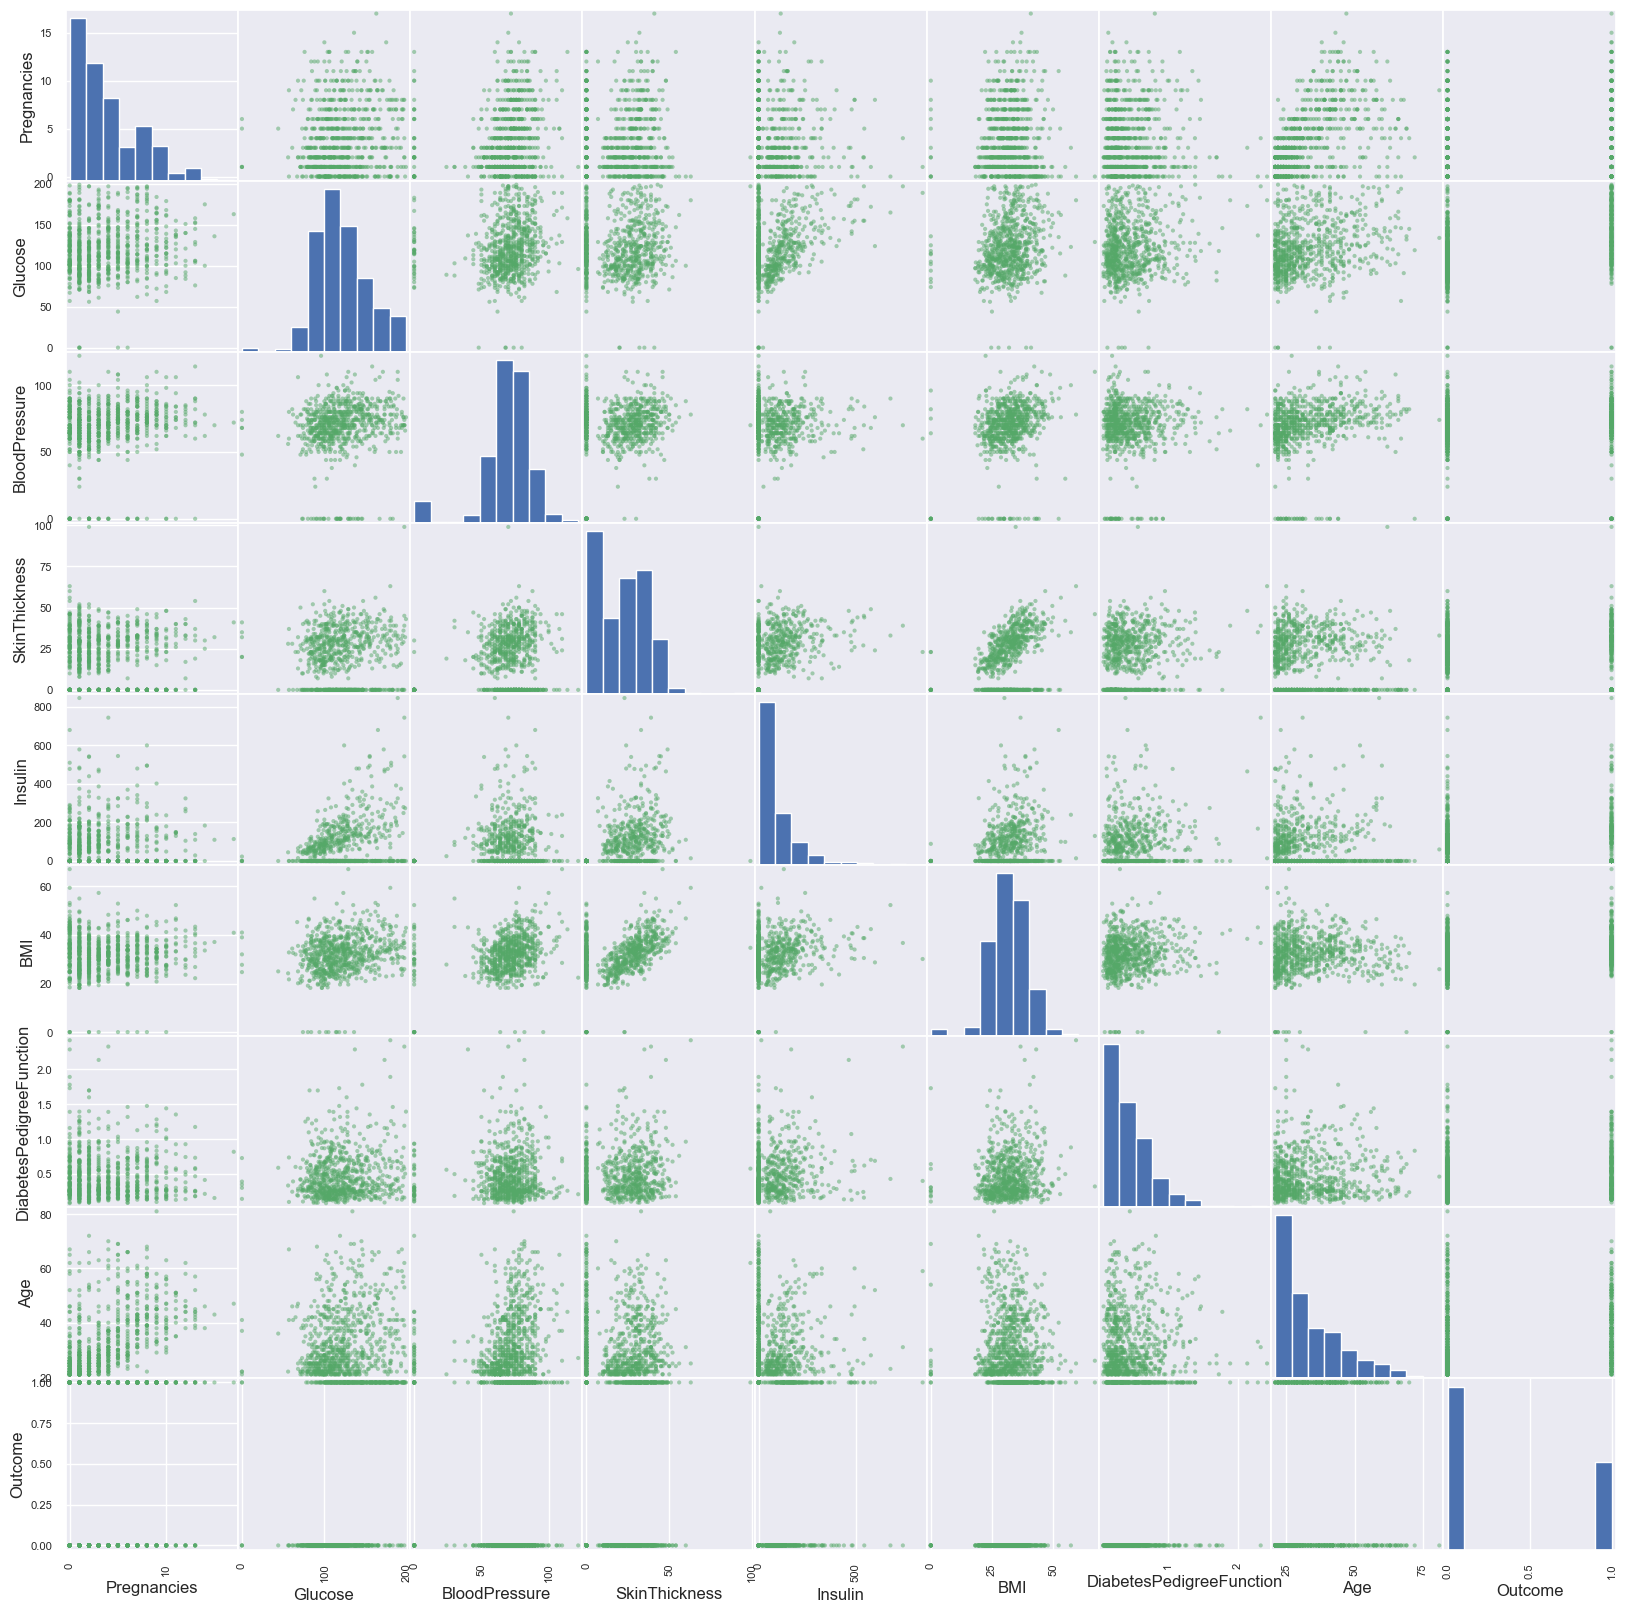

In [16]:
# Plotting a scatter matrix of uncleaned data

p = scatter_matrix(df,figsize=(20,20),color='g')

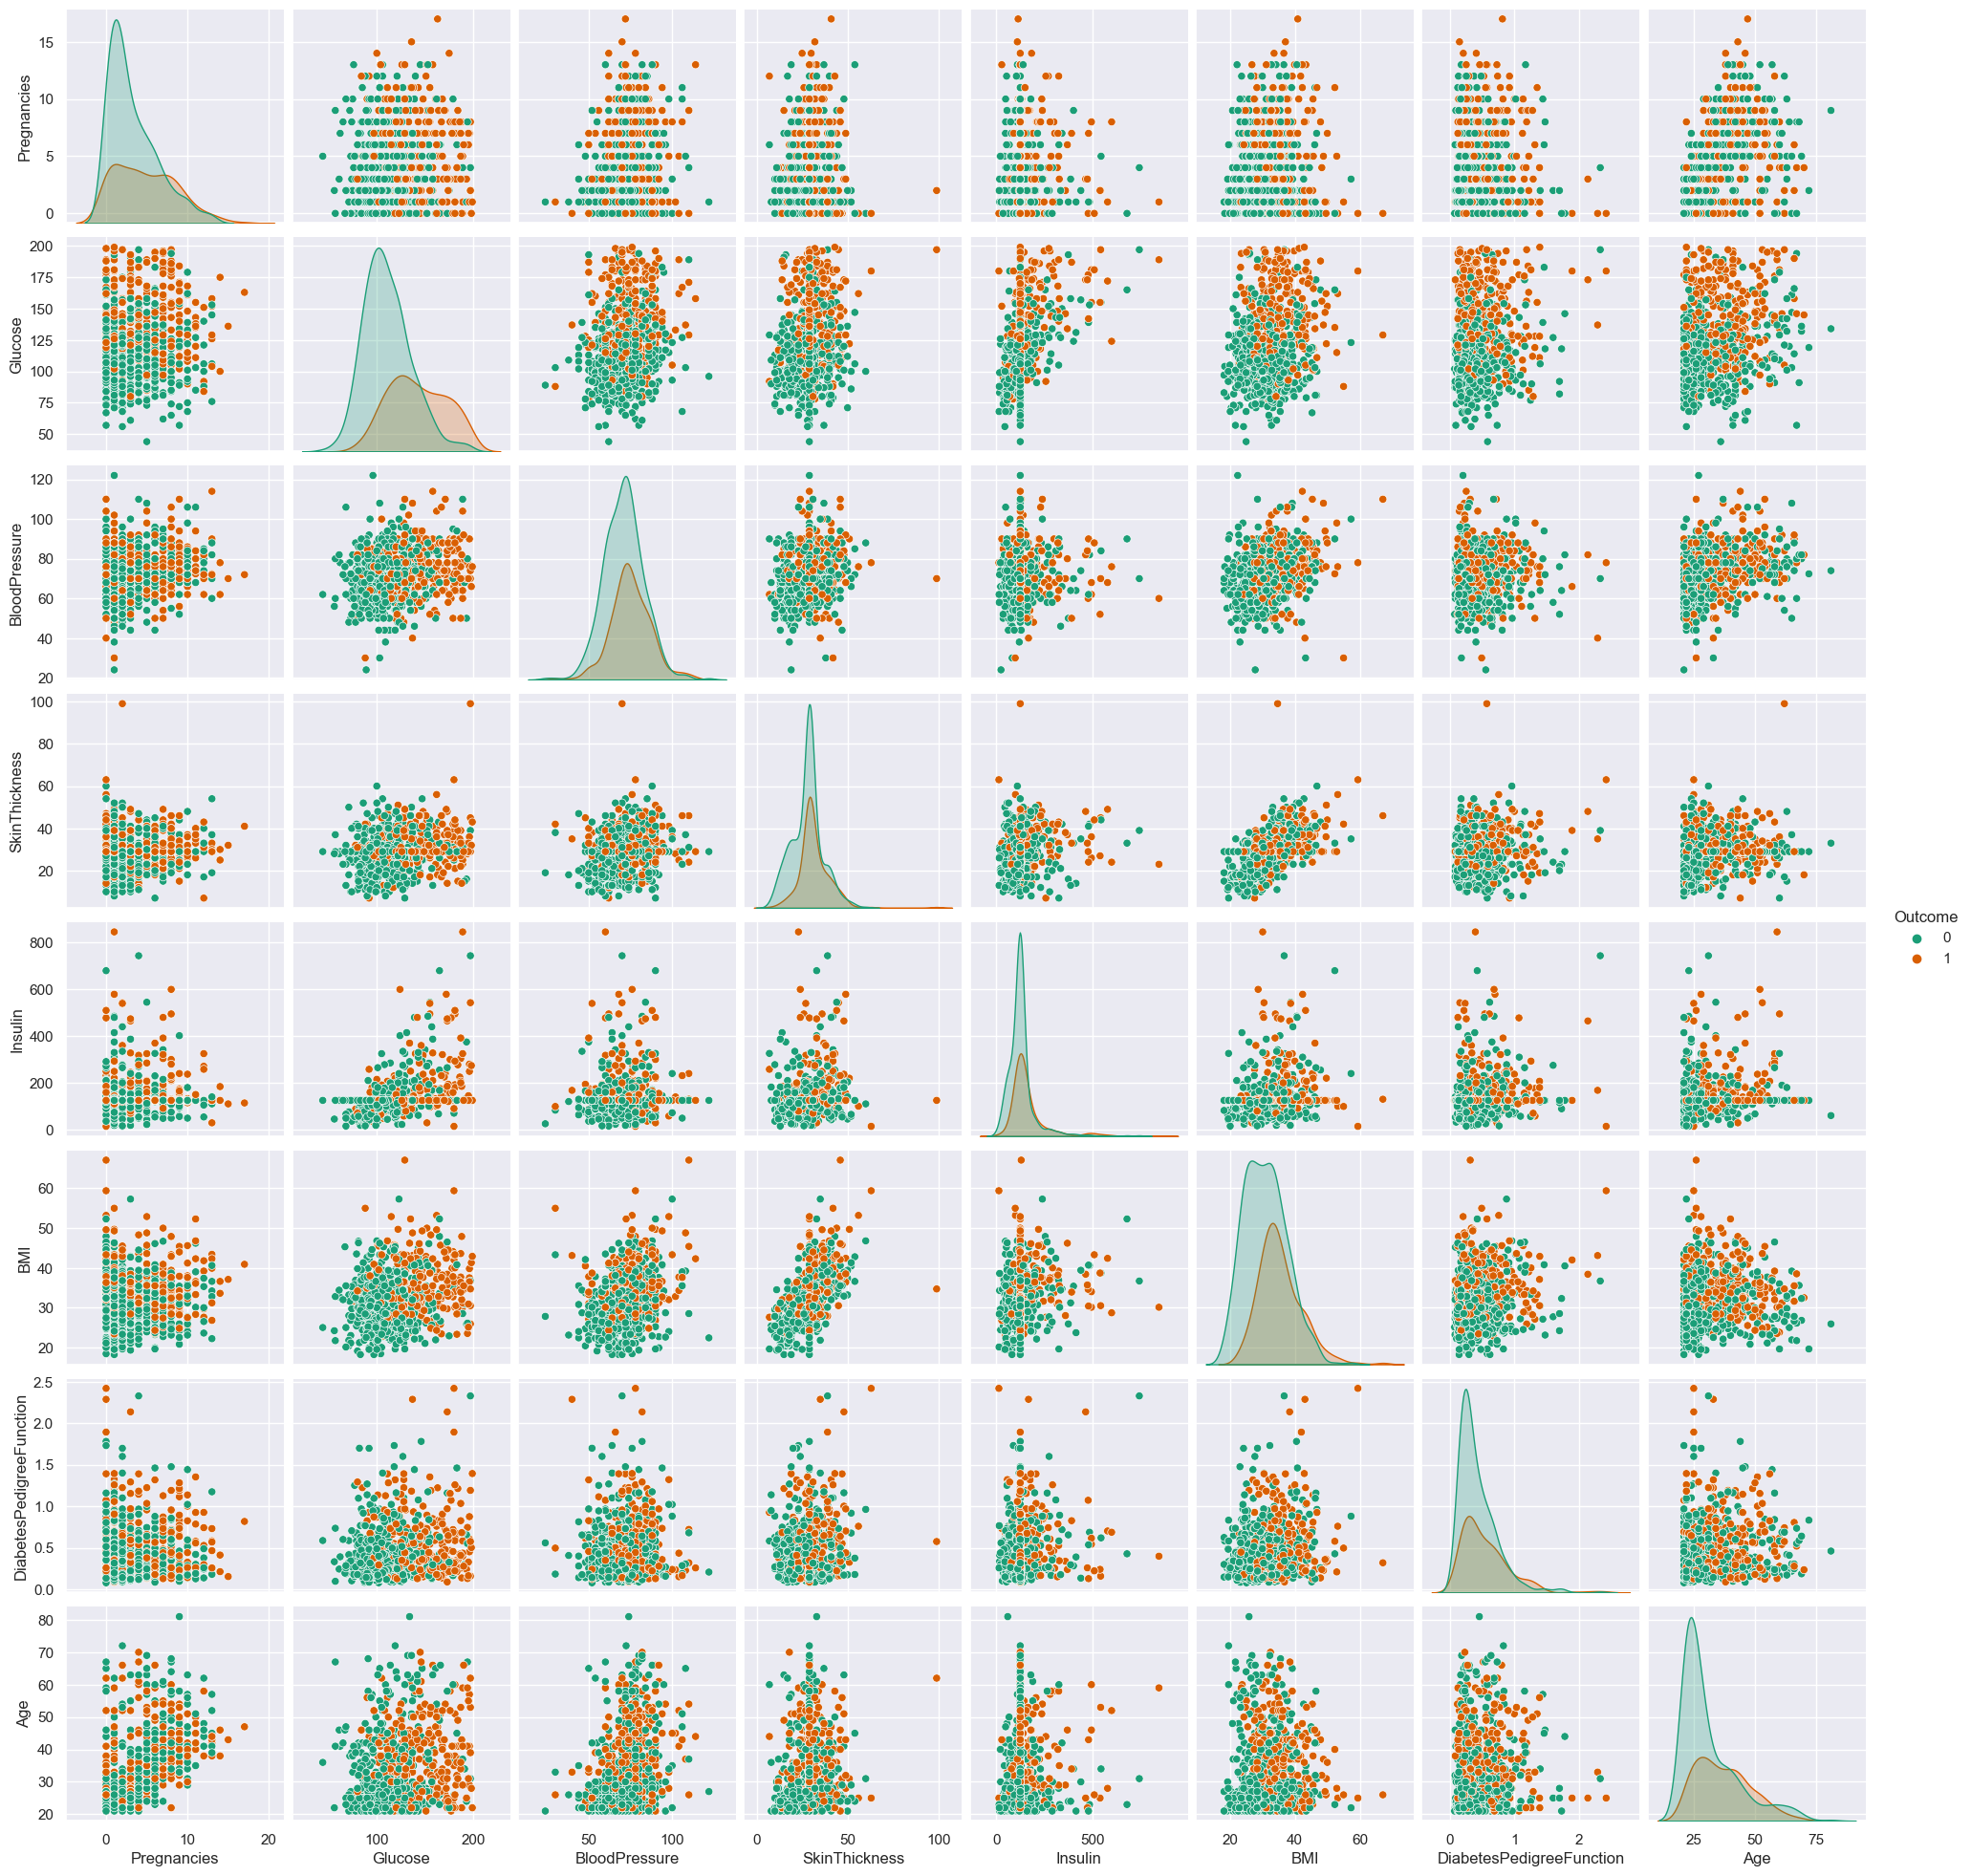

In [17]:
# Plotting the pair plots of the data

p = sns.pairplot(df_copy, hue = 'Outcome',palette='Dark2')

### Correlation between all the features

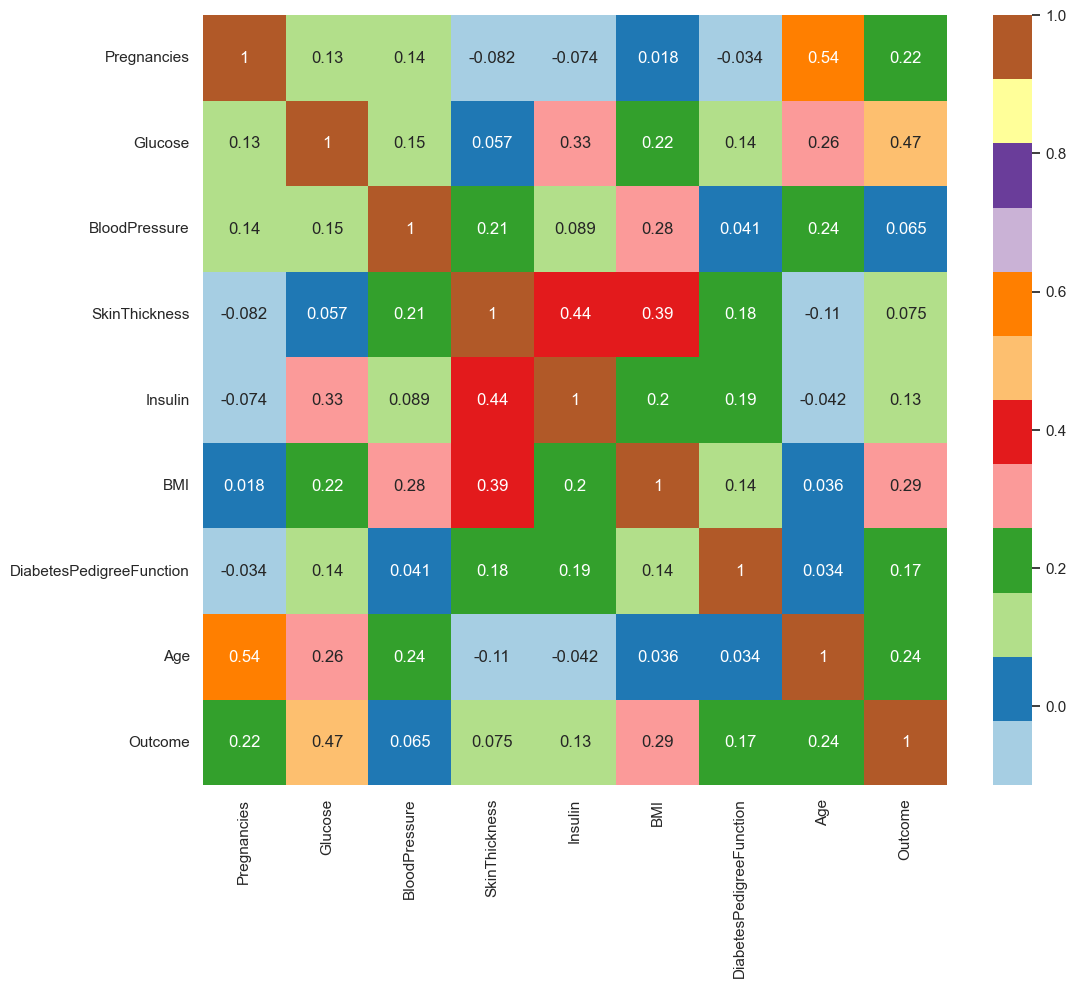

In [18]:
# Correlation between all the features before cleaning

plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot = True, cmap='Paired')

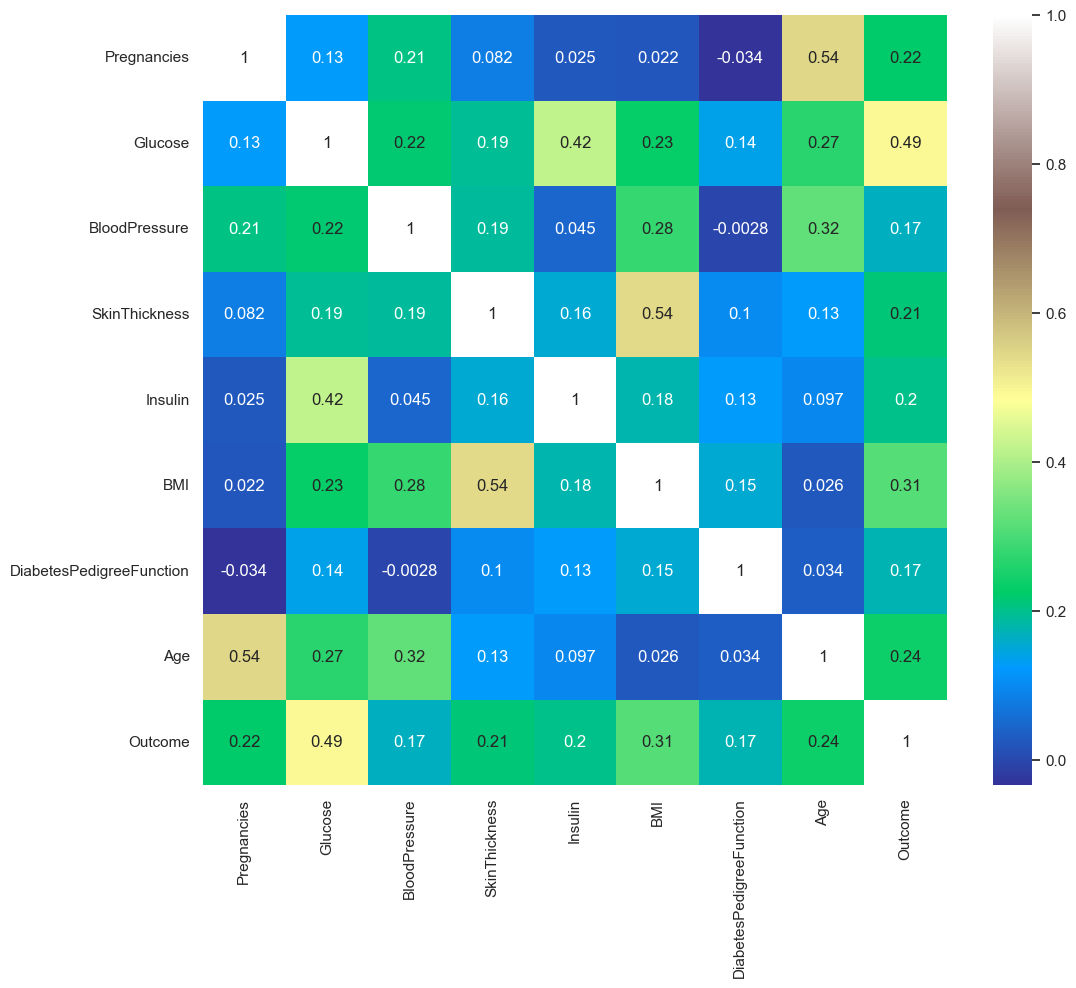

In [19]:
# Correlation between all the features after cleaning

plt.figure(figsize=(12,10))
p = sns.heatmap(df_copy.corr(),annot= True,cmap='terrain') 

### Scaling the Data

In [20]:
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [21]:
sc_X  = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis=1),),columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1      -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2       1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3      -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4      -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.680125       0.297376       2.150354  0.455573  0.064737   
764    -0.547919  0.010298      -0.198965      -0.239949 -0.181541  0.632365   
765     0.342981 -0.022579      -0.033518      -0.695245 -0.332132 -0.910418   
766    -0.844885  0.141808      -1.026200      -0.012301 -0.181541 -0.342790   
767    -0.844885 -0.943143      -0.198965       0.215347 -0.181541 -0.299127   

     DiabetesPedigreeFunction       Age  
0                    0.468492  1.425995  
1                   -0.365061 -0.190672  
2                    0.604397 -0.105584  
3                   -0.920763 -1.041549  
4                    5.484909 -0.020496  
..                        ...       ...  
763                 -0.908682  2.532136  
764                 -0.398282 -0.531023  
765                 -0.685193 -0.275760  
766                 -0.371101  1.170732  
767                 -0.473785 -0.871374  

[768 rows x 8 columns]

In [22]:
y = df_copy.Outcome

In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Splitting the data into Train and Test

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

# Model Building

### K-Nearest Neighbour (KNN)

In [25]:
test_scores=[]
train_scores=[]

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [26]:
train_scores

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.802734375,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

In [27]:
test_scores

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

In [28]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v==max_train_score]
print('Max train score{}% and k={}'.format(max_train_score * 100,list(map(lambda x: x+1, train_scores_ind)))) 

Max train score100.0% and k=[1]


In [29]:
## Score that comes from tetsing on the data points that were split in the begining

max_test_score = max(test_scores)
test_scores_ind = [i for i,v in enumerate(test_scores) if v == max_test_score]
print('Max test score{}% and k={}'.format(max_test_score * 100, list(map(lambda x: x+1, test_scores_ind))))

Max test score76.5625% and k=[11]


<AxesSubplot:>

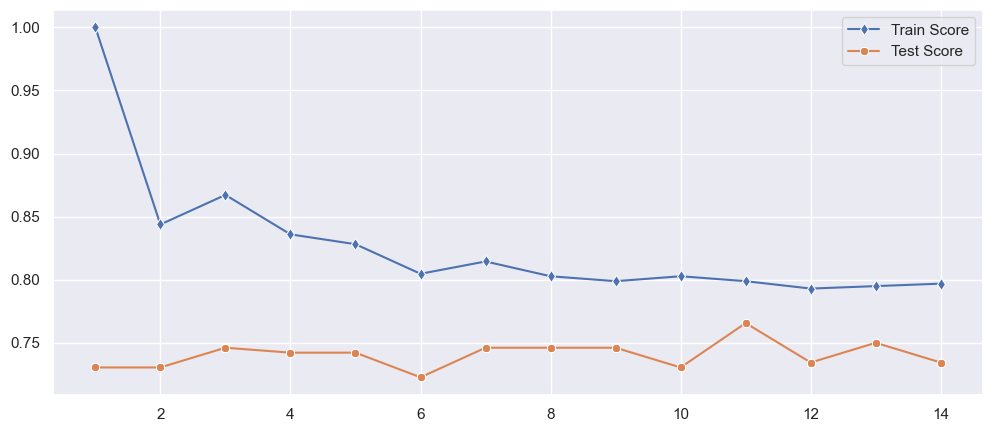

In [30]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, 15), y=train_scores, marker='d', label='Train Score')
sns.lineplot(x=range(1, 15), y=test_scores, marker='8', label='Test Score')

The best result is captured at k = 11 is used for the final model

In [31]:
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

Text(0.5, 1.0, 'Diabetes Data')

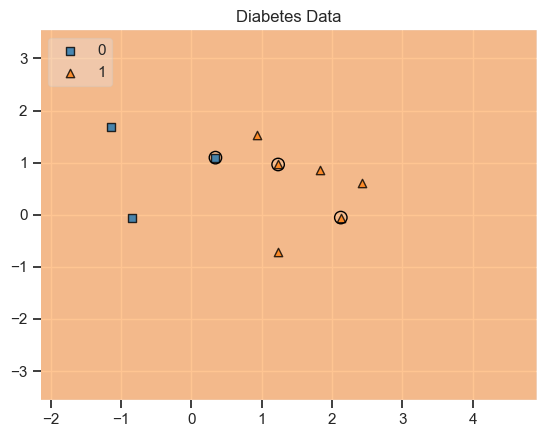

In [32]:
value = 20000
width = 20000

plot_decision_regions(
    X.values, y.values, clf=knn, legend=2,
    filler_feature_values={2: value, 3: value, 4: value, 5: value,6:value,7:value},
    filler_feature_ranges={2: width, 3: width, 4: width, 5: width,6:width,7:width},
    X_highlight=X_test.values)

plt.title('Diabetes Data')


### Confusion Matrix

Text(0.5, 20.049999999999997, 'Predicted Label')

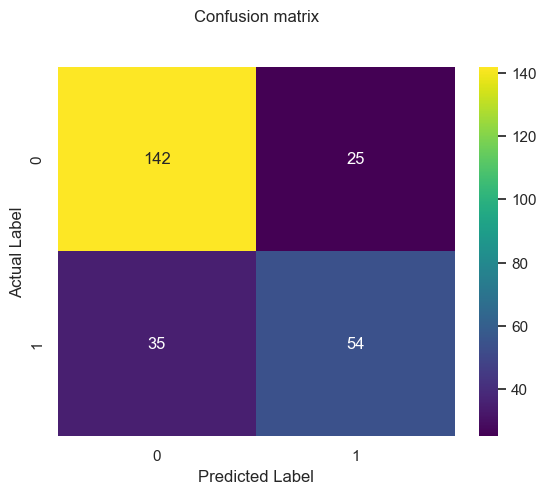

In [33]:
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="viridis",fmt='g')
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [34]:
# Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



### ROC-AUC Curve

The **ROC-AUC Curve** measures a classification model's ability to distinguish between classes; a higher AUC (closer to 1) indicates better performance. 

In [35]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

Text(0.5, 1.0, 'Knn(n_neighbors = 11)ROC curve')

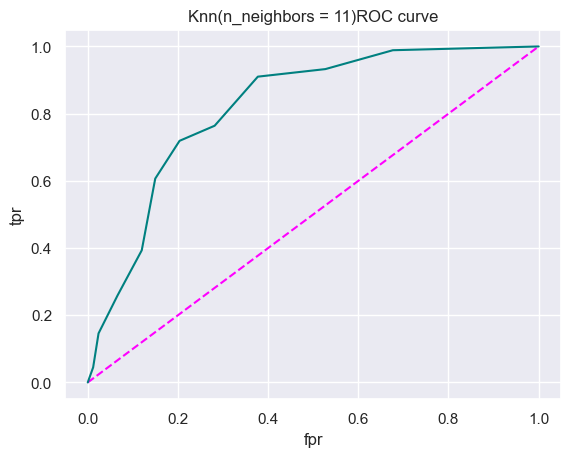

In [36]:
plt.plot([0,1],'k--',color='fuchsia')
plt.plot(fpr,tpr,label='Knn',color='teal')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors = 11)ROC curve')

In [37]:
roc_auc_score(y_test,y_pred_proba)

0.8193500639171096

### Implementing GridSearchCV

In [38]:
# In case of classifier like KNN the parameter to be tuned is n_neighbors

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:"+ str(knn_cv.best_score_))
print("Best Parameters:"+str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters:{'n_neighbors': 25}
